# MECANISMO BIELA-MANIVELA

## ANIMACIÓN

In [1]:
import numpy as np
import math as math
import array as arr
import pprint  # para depurar
import matplotlib.pyplot as plt  #Para graficas
import matplotlib.animation as animation
import scipy.integrate as integrate 
import os
from time import sleep
#%matplotlib inline (Para notebook)



print ('BIELA-MANIVELA')
print ('=============================')
# Lectura de datos por teclado

meca = {} # dictionary vacio, con propiedades de mecanismo

meca["L1"] = float (input ('Introduce longitud L1:'))
meca["L2"] = float (input ('Introduce longitud L2:'))
meca["theta"] = float (input ('Introduce angulo inicial theta:')) #En rad
meca["XB"] = float (input ('Introduce coordenada en x del punto B:'))
meca["XC"] = float (input ('Introduce coordenada en x del punto C:'))
meca["XA"] = 0
meca["YA"] = 0
meca["YB"] = 0 #LEER
meca["YC"] = 0 #LEER

# Defino posicion inicial:
q = np.array ([[0.1], [0.2], [1], [0.2], [meca["theta"]]])
print('q: ' + str(q))

# JACOBIANO
def jacob_Phiq(q,meca):
    #Inicializa a cero la matriz jacobiana
    Jacob = np.zeros((5,5))

    #Extraer coordenadas

    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    theta = q[4]

    #Montar matriz

    Jacob[0,0] = 2*X1
    Jacob[0,1] = 2*Y1
    Jacob[1,0] = -2*(X2-X1)
    Jacob[1,1] = -2*(Y2-Y1)
    Jacob[1,2] = 2*(X2-X1)
    Jacob[1,3] = 2*(Y2-Y1)
    Jacob[2,2] = meca["YB"] - meca["YC"]
    Jacob[2,3] = meca["XC"] - meca["XB"]

    if (abs(math.cos(theta)) < (math.sqrt(2)/2) ):
        Jacob[3,4] = -meca["L1"]*math.sin(theta)
        Jacob[3,0] = 1
    else:
        Jacob[3,4] = meca["L1"]*math.cos(theta)
        Jacob[3,1] = 1

 
    Jacob[4,4] = 1

    return Jacob


def Phi (q,meca):
    #Inicializa a cero Phi
    Phi = np.zeros((5,1))

    #Extraer coordenadas
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    theta = q[4]

    Phi[0] = X1**2 + Y1**2 - meca["L1"]**2
    Phi[1] = (X2-X1)**2 + (Y2-Y1)**2 -meca["L2"]**2
    Phi[2] = (meca["XC"] - meca["XB"])*(Y2-meca["YB"]) - (meca["YC"]-meca["YB"])*(X2-meca["XB"])
	

    if (abs(math.cos(theta)) < (math.sqrt(2)/2) ):
        Phi[3] = X1-meca["L1"]*math.cos(theta)
    else: 
        Phi[3] = Y1-meca["L1"]*math.sin(theta)
    
    
    
    return Phi



def resuelve_prob_posicion(q_init, meca):
    #Inicializacion de variables
    error = 1e10
    tolerancia = 1e-10

    #Inicializacion en cero de deltaQ, fi y q
    deltaQ = np.zeros ((5,1))
    q = q_init
    i=0

    # Iteraciones hasta conseguir que el error sea menor que la tolerancia

    while (error > tolerancia and i<=100):
        #print("q=")
        #pprint.pprint(q)


        #Extraer las coordenadas
        X1 = q[0]
        Y1 = q[1]
        X2 = q[2]
        Y2 = q[3]
        theta = q[4]
       
        fi=Phi(q,meca)
      
        J = jacob_Phiq(q,meca)

        
        deltaQ = np.linalg.solve(J,-fi)
        q = q + deltaQ
        error = np.linalg.norm(deltaQ)  # El error es el modulo del vector
        i=i+1
        
    if (error > tolerancia):
        raise Exception ('No se puede alcanzar la posición')  
        
    return q

q = resuelve_prob_posicion(q,meca)

def dibuja_mecanismo(q, meca):


    # Extraer los puntos moviles del mecanismo
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    theta = q[4]
    
    plt.axis('equal')

    
    plt.plot ([meca["XA"], X1], [meca["YA"], Y1])    #[pos inicial (x1,x2), pos final (y1,y2)]
    plt.plot ([X1, X2], [Y1, Y2])  
    plt.plot ([meca["XB"],meca["XC"]], [meca["YB"],meca["YC"]], linestyle='dashed')  

    plt.plot(meca["XA"], meca["YA"], 'bo')  
    plt.plot(meca["XB"], meca["YB"], 'go') 
    plt.plot(meca["XC"], meca["YC"], 'go') 
    
    plt.show()#block=False) 
    return



BIELA-MANIVELA
Introduce longitud L1:1
Introduce longitud L2:2
Introduce angulo inicial theta:0.5
Introduce coordenada en x del punto B:2
Introduce coordenada en x del punto C:3
q: [[0.1]
 [0.2]
 [1. ]
 [0.2]
 [0.5]]


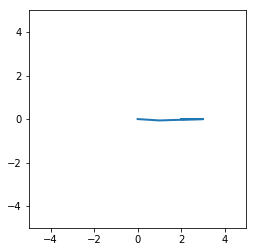

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()

ax.set_xlim(( -5, 5))
ax.set_ylim((-5,5))
ax.set_aspect('equal')

line, = ax.plot([], [], lw=2)

last_q = q

def init():
    line.set_data([], [])
    return (line,)

def animate(i,q,meca):
    global last_q
    q = last_q
    # i: contador de iteracion: hay que mapearla a un ángulo de la manivela
    omega=2*3.14159/100  # vel. angular
    q[4] = i*omega
    
    #llamar problema de pos:    
    q = resuelve_prob_posicion(q, meca)
    last_q = q
     
    #Extraer las coordenadas
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    theta = q[4]
       
    x=[meca["XA"], X1, X2, meca["XB"], meca["XC"]]
    y=[meca["YA"], Y1, Y2, meca["YB"], meca["YC"]]
    
    
    line.set_data(x, y)
    return (line,)


anim = animation.FuncAnimation(fig, animate, init_func=init, fargs=(q,meca),
                               frames=100, interval=20, 
                               blit=True)

HTML(anim.to_html5_video())


q
array([[1.],
       [0.],
       [3.],
       [0.],
       [0.]])


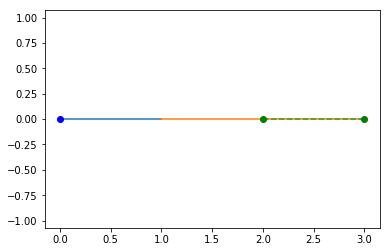

q
array([[0.9961947 ],
       [0.08715567],
       [2.99429477],
       [0.        ],
       [0.08726639]])


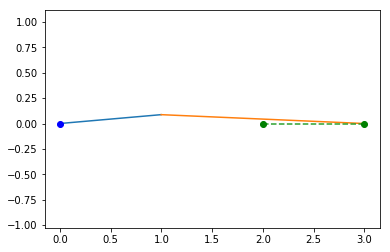

q
array([[0.98480778],
       [0.17364803],
       [2.97725511],
       [0.        ],
       [0.17453278]])


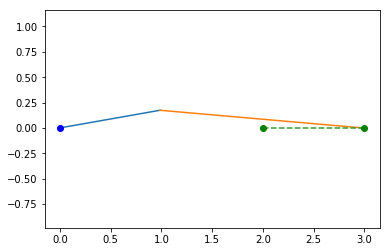

q
array([[0.96592588],
       [0.25881883],
       [2.94910838],
       [0.        ],
       [0.26179917]])


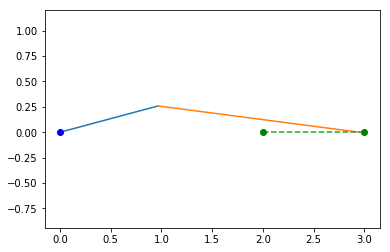

q
array([[0.93969272],
       [0.34201987],
       [2.91023133],
       [0.        ],
       [0.34906556]])


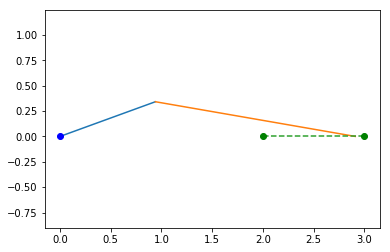

q
array([[0.90630794],
       [0.42261793],
       [2.86114658],
       [0.        ],
       [0.43633194]])


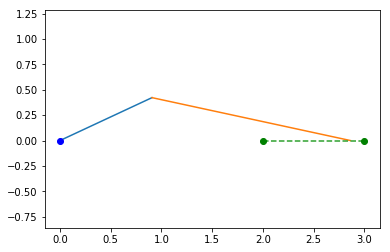

q
array([[0.86602562],
       [0.49999962],
       [2.8025174 ],
       [0.        ],
       [0.52359833]])


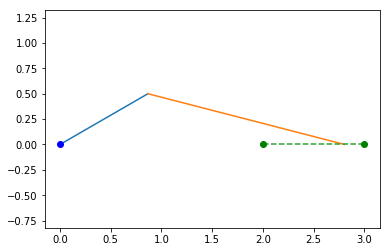

q
array([[0.81915234],
       [0.57357601],
       [2.73514048],
       [0.        ],
       [0.61086472]])


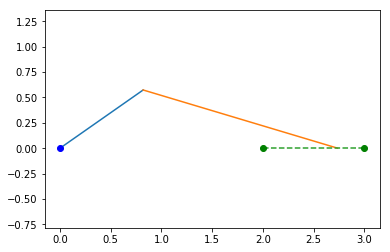

q
array([[0.76604482],
       [0.64278716],
       [2.65993623],
       [0.        ],
       [0.69813111]])


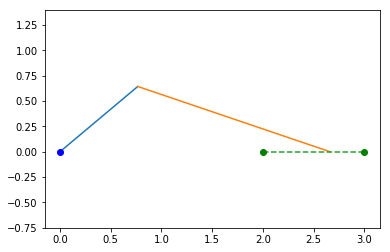

q
array([[0.70710725],
       [0.70710631],
       [2.57793612],
       [0.        ],
       [0.7853975 ]])


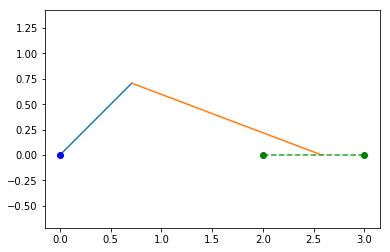

q
array([[0.64278817],
       [0.76604397],
       [2.49026663],
       [0.        ],
       [0.87266389]])


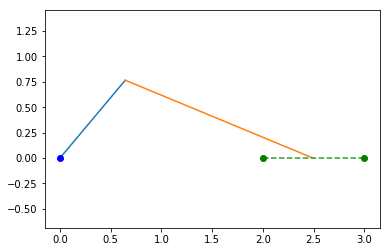

q
array([[0.5735771 ],
       [0.81915158],
       [2.39812929],
       [0.        ],
       [0.95993028]])


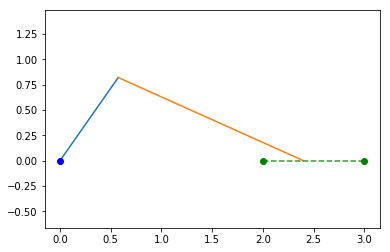

q
array([[0.50000077],
       [0.86602496],
       [2.30277662],
       [0.        ],
       [1.04719667]])


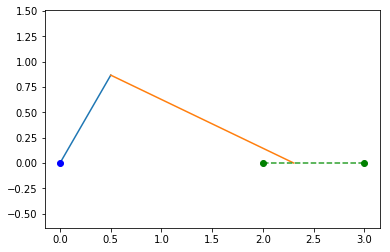

q
array([[0.42261913],
       [0.90630738],
       [2.20548394],
       [0.        ],
       [1.13446306]])


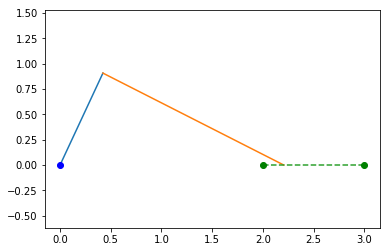

q
array([[0.34202111],
       [0.93969227],
       [2.10751777],
       [0.        ],
       [1.22172944]])


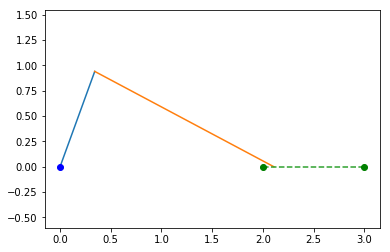

q
array([[0.25882011],
       [0.96592554],
       [2.01010189],
       [0.        ],
       [1.30899583]])


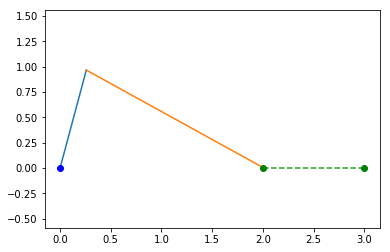

q
array([[0.17364934],
       [0.98480755],
       [1.91438312],
       [0.        ],
       [1.39626222]])


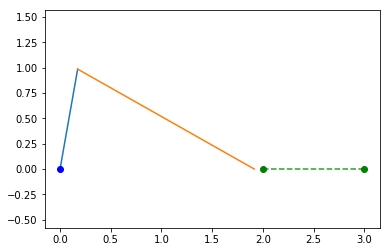

q
array([[0.08715699],
       [0.99619459],
       [1.82139929],
       [0.        ],
       [1.48352861]])


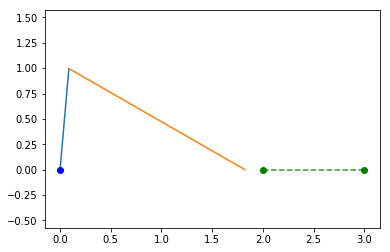

q
array([[1.32679490e-06],
       [1.00000000e+00],
       [1.73205213e+00],
       [0.00000000e+00],
       [1.57079500e+00]])


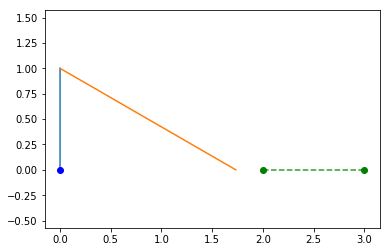

q
array([[-0.08715435],
       [ 0.99619482],
       [ 1.64708782],
       [ 0.        ],
       [ 1.65806139]])


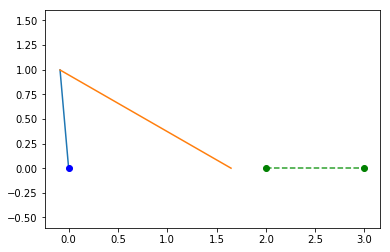

q
array([[-0.17364673],
       [ 0.98480801],
       [ 1.56708679],
       [ 0.        ],
       [ 1.74532778]])


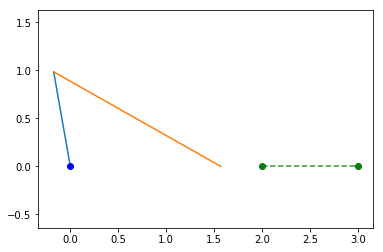

q
array([[-0.25881755],
       [ 0.96592623],
       [ 1.49246384],
       [ 0.        ],
       [ 1.83259417]])


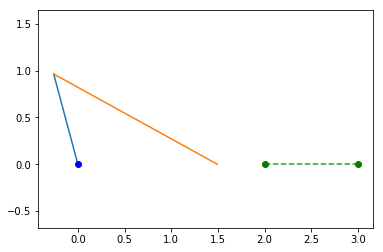

q
array([[-0.34201862],
       [ 0.93969318],
       [ 1.42347755],
       [ 0.        ],
       [ 1.91986056]])


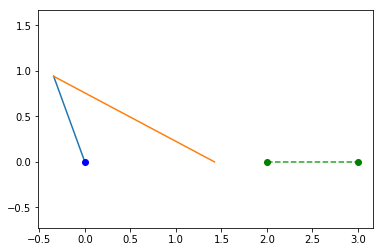

q
array([[-0.42261673],
       [ 0.9063085 ],
       [ 1.36024751],
       [ 0.        ],
       [ 2.00712694]])


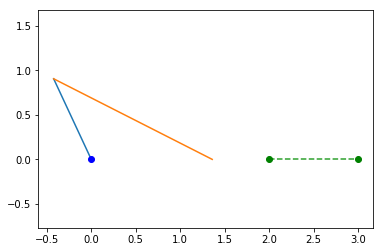

q
array([[-0.49999847],
       [ 0.86602629],
       [ 1.30277674],
       [ 0.        ],
       [ 2.09439333]])


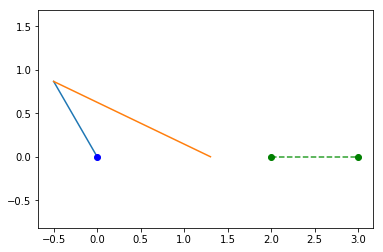

q
array([[-0.57357493],
       [ 0.8191531 ],
       [ 1.25097658],
       [ 0.        ],
       [ 2.18165972]])


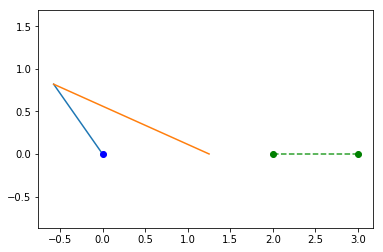

q
array([[-0.64278614],
       [ 0.76604568],
       [ 1.2046916 ],
       [ 0.        ],
       [ 2.26892611]])


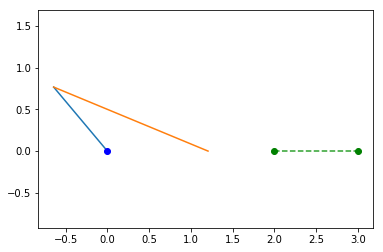

q
array([[-0.70710537],
       [ 0.70710819],
       [ 1.16372279],
       [ 0.        ],
       [ 2.3561925 ]])


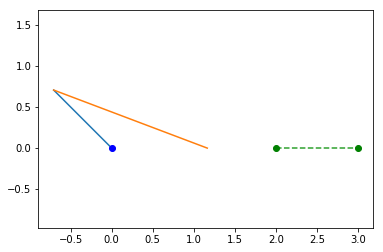

q
array([[-0.76604312],
       [ 0.64278919],
       [ 1.1278476 ],
       [ 0.        ],
       [ 2.44345889]])


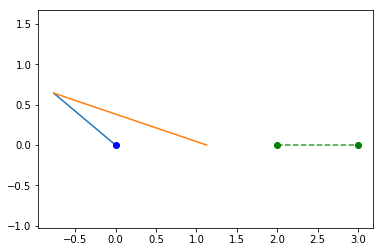

q
array([[-0.81915082],
       [ 0.57357819],
       [ 1.09683667],
       [ 0.        ],
       [ 2.53072528]])


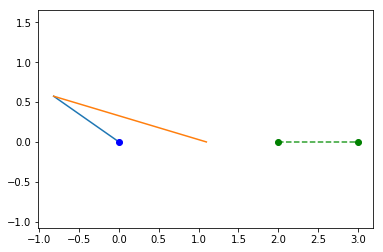

q
array([[-0.8660243 ],
       [ 0.50000192],
       [ 1.07046688],
       [ 0.        ],
       [ 2.61799167]])


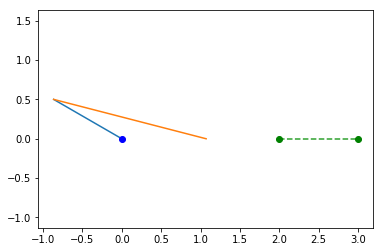

q
array([[-0.90630682],
       [ 0.42262033],
       [ 1.04853129],
       [ 0.        ],
       [ 2.70525806]])


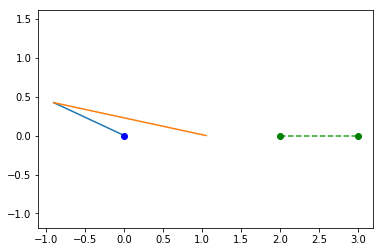

q
array([[-0.93969181],
       [ 0.34202236],
       [ 1.03084636],
       [ 0.        ],
       [ 2.79252444]])


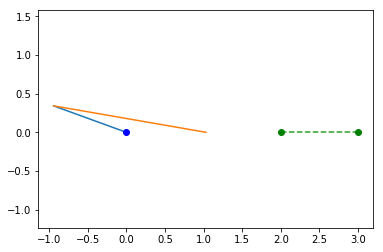

q
array([[-0.9659252 ],
       [ 0.25882139],
       [ 1.01725696],
       [ 0.        ],
       [ 2.87979083]])


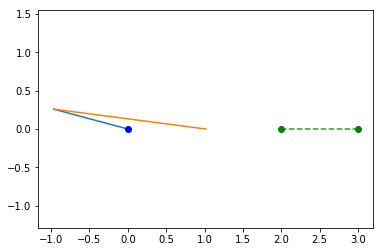

q
array([[-0.98480732],
       [ 0.17365065],
       [ 1.00763978],
       [ 0.        ],
       [ 2.96705722]])


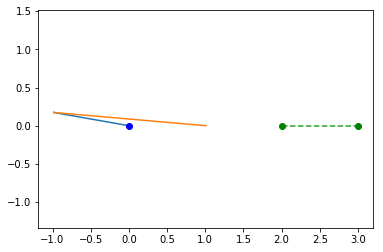

q
array([[-0.99619447],
       [ 0.08715831],
       [ 1.00190548],
       [ 0.        ],
       [ 3.05432361]])


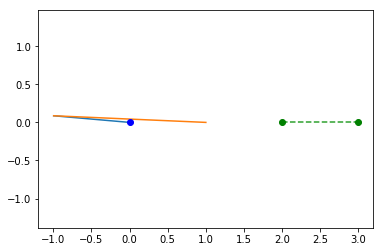

q
array([[-1.00000000e+00],
       [ 2.65358979e-06],
       [ 1.00000000e+00],
       [ 0.00000000e+00],
       [ 3.14159000e+00]])


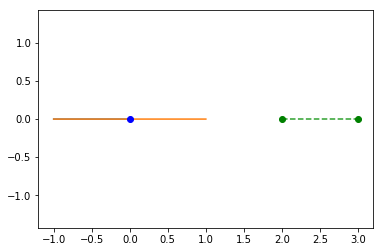

q
array([[-0.99619494],
       [-0.08715303],
       [ 1.00190525],
       [ 0.        ],
       [ 3.22885639]])


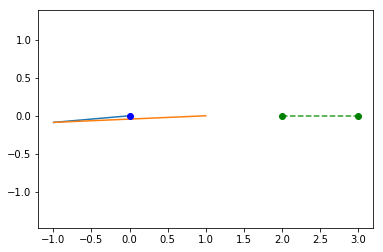

q
array([[-0.98480824],
       [-0.17364542],
       [ 1.00763932],
       [ 0.        ],
       [ 3.31612278]])


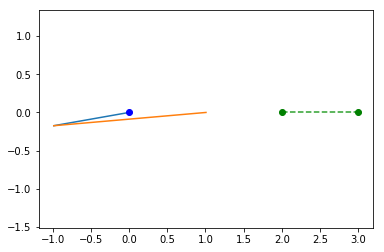

q
array([[-0.96592657],
       [-0.25881627],
       [ 1.01725626],
       [ 0.        ],
       [ 3.40338917]])


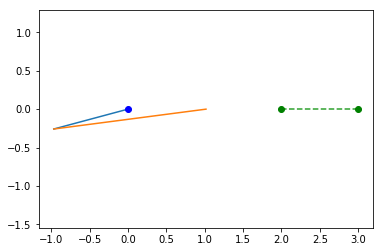

q
array([[-0.93969363],
       [-0.34201737],
       [ 1.03084541],
       [ 0.        ],
       [ 3.49065556]])


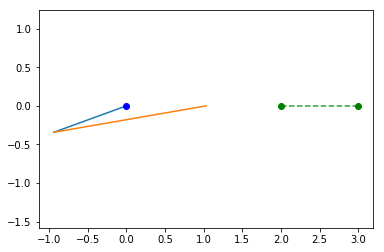

q
array([[-0.90630906],
       [-0.42261552],
       [ 1.04853009],
       [ 0.        ],
       [ 3.57792194]])


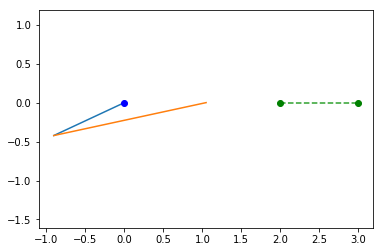

q
array([[-0.86602695],
       [-0.49999732],
       [ 1.07046541],
       [ 0.        ],
       [ 3.66518833]])


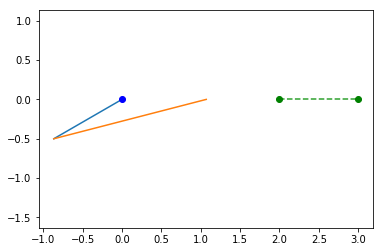

q
array([[-0.81915386],
       [-0.57357384],
       [ 1.09683493],
       [ 0.        ],
       [ 3.75245472]])


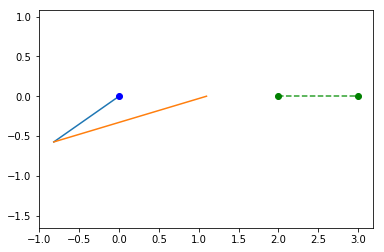

q
array([[-0.76604653],
       [-0.64278513],
       [ 1.12784557],
       [ 0.        ],
       [ 3.83972111]])


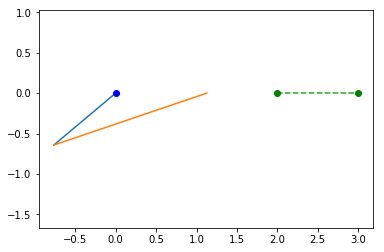

q
array([[-0.70710913],
       [-0.70710444],
       [ 1.16372045],
       [ 0.        ],
       [ 3.9269875 ]])


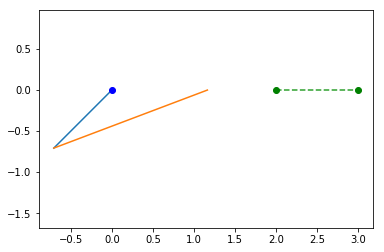

q
array([[-0.64279021],
       [-0.76604226],
       [ 1.20468895],
       [ 0.        ],
       [ 4.01425389]])


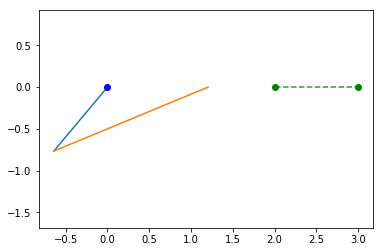

q
array([[-0.57357927],
       [-0.81915006],
       [ 1.2509736 ],
       [ 0.        ],
       [ 4.10152028]])


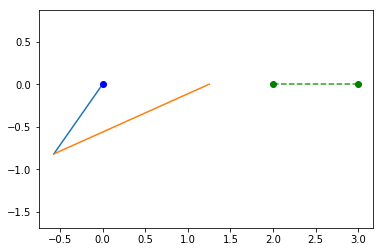

q
array([[-0.50000306],
       [-0.86602363],
       [ 1.30277342],
       [ 0.        ],
       [ 4.18878667]])


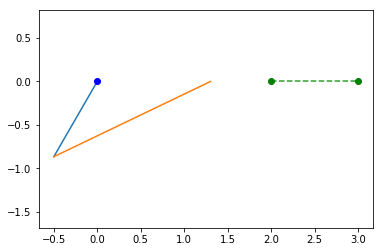

q
array([[-0.42262154],
       [-0.90630626],
       [ 1.36024384],
       [ 0.        ],
       [ 4.27605306]])


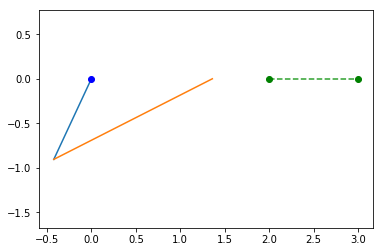

q
array([[-0.34202361],
       [-0.93969136],
       [ 1.42347353],
       [ 0.        ],
       [ 4.36331944]])


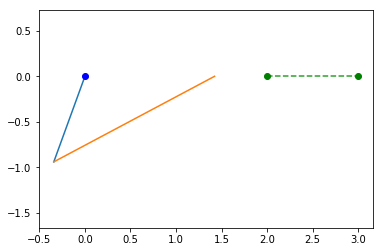

q
array([[-0.25882268],
       [-0.96592485],
       [ 1.49245948],
       [ 0.        ],
       [ 4.45058583]])


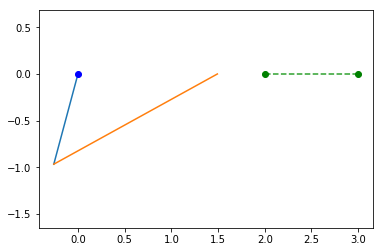

q
array([[-0.17365195],
       [-0.98480709],
       [ 1.56708209],
       [ 0.        ],
       [ 4.53785222]])


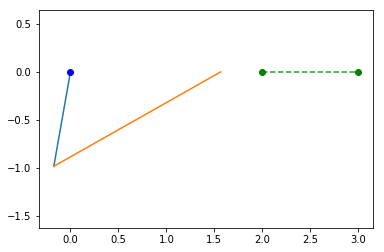

q
array([[-0.08715963],
       [-0.99619436],
       [ 1.64708279],
       [ 0.        ],
       [ 4.62511861]])


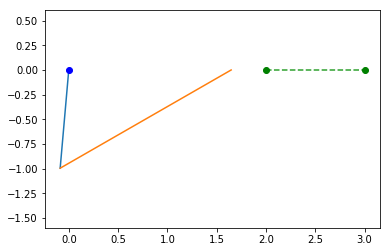

q
array([[-3.98038469e-06],
       [-1.00000000e+00],
       [ 1.73204683e+00],
       [ 0.00000000e+00],
       [ 4.71238500e+00]])


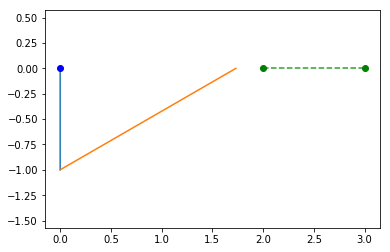

q
array([[ 0.0871517 ],
       [-0.99619505],
       [ 1.82139373],
       [ 0.        ],
       [ 4.79965139]])


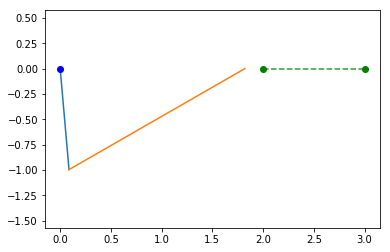

q
array([[ 0.17364411],
       [-0.98480847],
       [ 1.91437737],
       [ 0.        ],
       [ 4.88691778]])


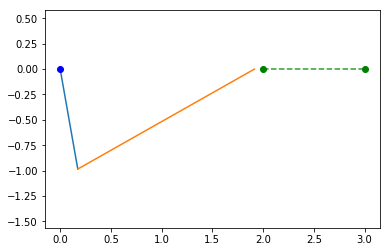

q
array([[ 0.25881499],
       [-0.96592691],
       [ 2.010096  ],
       [ 0.        ],
       [ 4.97418417]])


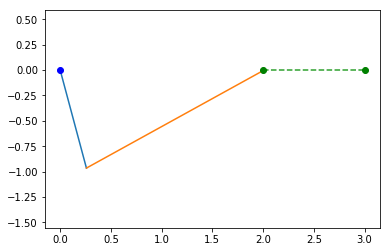

q
array([[ 0.34201613],
       [-0.93969408],
       [ 2.10751182],
       [ 0.        ],
       [ 5.06145056]])


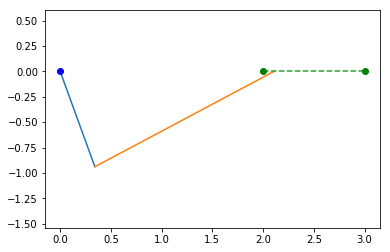

q
array([[ 0.42261432],
       [-0.90630962],
       [ 2.20547799],
       [ 0.        ],
       [ 5.14871694]])


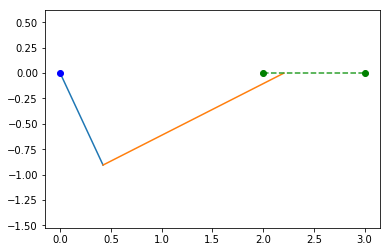

q
array([[ 0.49999617],
       [-0.86602762],
       [ 2.30277075],
       [ 0.        ],
       [ 5.23598333]])


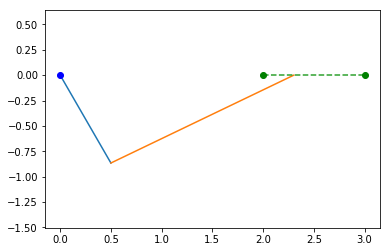

q
array([[ 0.57357275],
       [-0.81915462],
       [ 2.39812358],
       [ 0.        ],
       [ 5.32324972]])


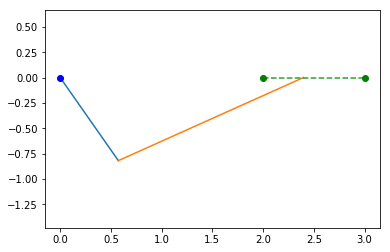

q
array([[ 0.64278411],
       [-0.76604738],
       [ 2.49026115],
       [ 0.        ],
       [ 5.41051611]])


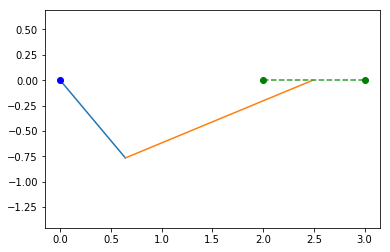

q
array([[ 0.7071035 ],
       [-0.70711006],
       [ 2.57793095],
       [ 0.        ],
       [ 5.4977825 ]])


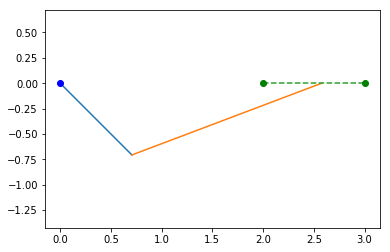

q
array([[ 0.76604141],
       [-0.64279122],
       [ 2.65993144],
       [ 0.        ],
       [ 5.58504889]])


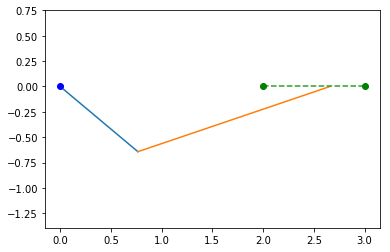

q
array([[ 0.8191493 ],
       [-0.57358036],
       [ 2.73513614],
       [ 0.        ],
       [ 5.67231528]])


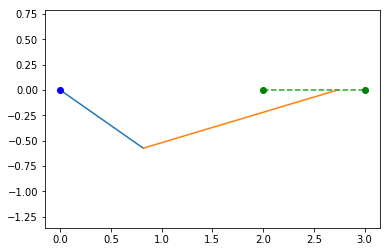

q
array([[ 0.86602297],
       [-0.50000421],
       [ 2.80251356],
       [ 0.        ],
       [ 5.75958167]])


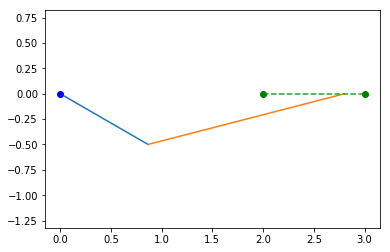

q
array([[ 0.9063057 ],
       [-0.42262274],
       [ 2.86114329],
       [ 0.        ],
       [ 5.84684806]])


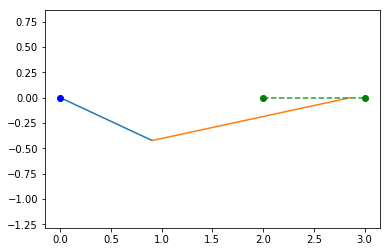

q
array([[ 0.93969091],
       [-0.34202485],
       [ 2.91022865],
       [ 0.        ],
       [ 5.93411444]])


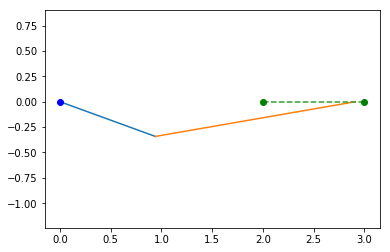

q
array([[ 0.96592451],
       [-0.25882396],
       [ 2.94910634],
       [ 0.        ],
       [ 6.02138083]])


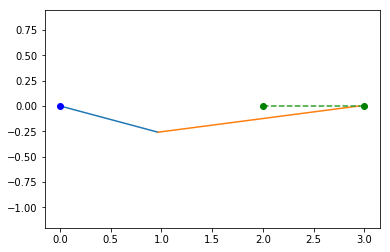

q
array([[ 0.98480686],
       [-0.17365326],
       [ 2.97725373],
       [ 0.        ],
       [ 6.10864722]])


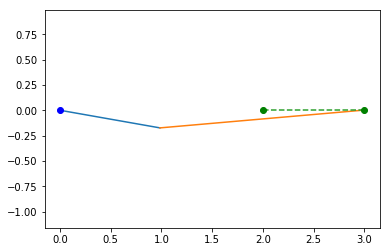

q
array([[ 0.99619424],
       [-0.08716096],
       [ 2.99429408],
       [ 0.        ],
       [ 6.19591361]])


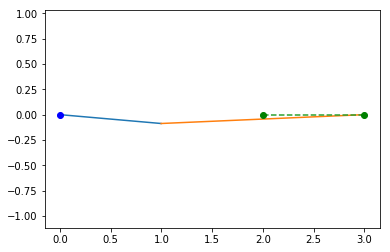

In [ ]:
i = 0

while (i<200):
      
    q[4] = i*5*3.14159/180
    q = resuelve_prob_posicion(q,meca)
    print ("q")
    pprint.pprint (q)
    dibuja_mecanismo(q,meca) 
    sleep(0.2)
    i= i+1
